MAP Inference Results:
S1: Sunny
S2: Sunny
S3: Sunny
S4: Sunny
S5: Rainy

Stations: ['S1', 'S2', 'S3', 'S4', 'S5']
Evidence: {'S1': 0, 'S5': 1}
(S1 ⟂ S4, S3 | S5, S2)
(S2 ⟂ S5, S4 | S3, S1)
(S3 ⟂ S5, S1 | S4, S2)
(S4 ⟂ S2, S1 | S5, S3)
(S5 ⟂ S3, S2 | S4, S1)


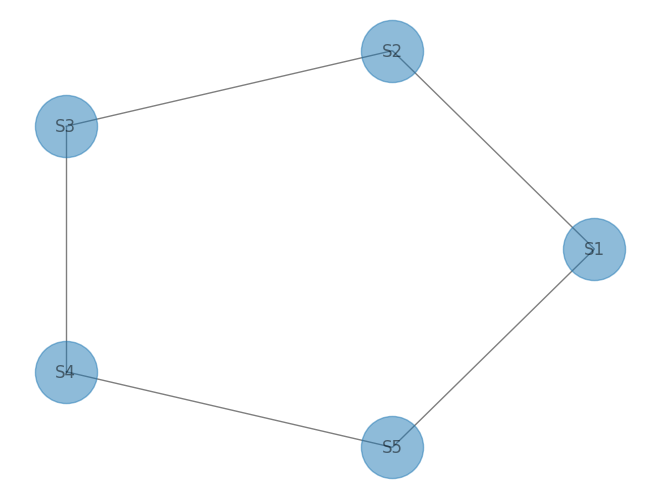

In [2]:
import numpy as np
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt



# Define the Markov Network
model = MarkovNetwork()

# Add nodes (weather stations)
n = 5  # Number of weather stations
stations = [f'S{i}' for i in range(1, n+1)]
model.add_nodes_from(stations)

# Add edges (connections between adjacent stations and the circular connection)
edges = [(stations[i], stations[(i+1) % n]) for i in range(n)]
model.add_edges_from(edges)

# Define the factor for each node
for station in stations:
    node_cpd = DiscreteFactor([station], [3], [0.5, 0.3, 0.2])  # P(S) = 0.5, P(P) = 0.3, P(N) = 0.2
    model.add_factors(node_cpd)

# Define the factor for each edge
for edge in edges:
    edge_cpd = DiscreteFactor(edge, [3, 3], [
        0.7, 0.2, 0.1,
        0.2, 0.6, 0.2,
        0.1, 0.3, 0.6
    ])
    model.add_factors(edge_cpd)

# Perform MAP inference
bp = BeliefPropagation(model)

# Example: Let's say we know the weather at the first and last stations
evidence = {stations[0]: 0, stations[-1]: 1}  # 0: Sunny, 1: Rainy, 2: Cloudy

# Perform MAP query on variables not in evidence
variables_for_query = [station for station in stations if station not in evidence]
map_query = bp.map_query(variables=variables_for_query, evidence=evidence)

# Combine evidence and MAP query results
full_result = {**evidence, **map_query}

# Print results
weather_states = ['Sunny', 'Rainy', 'Cloudy']
print("MAP Inference Results:")
for station in stations:
    state = full_result[station]
    print(f"{station}: {weather_states[state]}")

print("\nStations:", stations)
print("Evidence:", evidence)
print(model.get_local_independencies())

import networkx as nx

pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)